In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [2]:
def genreate_stock_data(stock_name,period):
    company = yf.Ticker(stock_name)
    df = company.history(period=period)
    
    #Sepreate the dates of the stock for further use if required
    date = (df.reset_index())['Date']
    #-------------------------------------------------------------------------------------------------------------
    
    #Remove data object from the database
    df = (df.reset_index()).drop('Date',axis=1)
    #-------------------------------------------------------------------------------------------------------------
    
    #Create the current trend of the current stock
    t = []
    for i in range(len(df)):
        if(df['Open'].iloc[i]-df['Close'].iloc[i]>0):
            t.append("DOWN")
        else:
            t.append("UP")
            
    df['Trend']=t
    #-------------------------------------------------------------------------------------------------------------
    
    #Create the trend history of the stock
    th=[0]
    current_trend = df['Trend'].iloc[0]
    count = 0
    for i in range(1,len(df)):
        if(current_trend==df['Trend'].iloc[i]):
            count+=1
            th.append(count)
        else:
            count = 0
            th.append(count)
            current_trend = df['Trend'].iloc[i]
            
    df["Trend history"]=th
    #-------------------------------------------------------------------------------------------------------------
    
    #Create the comparison to the change since last peak
    p=[]
    v=[]
    if(df['Trend'].iloc[0]=="DOWN"):
        peak = df['Open'].iloc[0]
        valley = df['Close'].iloc[0]
    else:
        valley = df['Open'].iloc[0]
        peak = df['Close'].iloc[0]

    for i in range(0,len(df)):

        p.append(peak-df['Close'].iloc[i])
        v.append(valley-df['Close'].iloc[i])

        if peak<df['Close'].iloc[i]:
            peak = df['Close'].iloc[i]
        if valley>df['Close'].iloc[i]:
            valley = df['Close'].iloc[i]
            
    df['Change since last peak']=p
    df['Change since last drop']=v
    #-------------------------------------------------------------------------------------------------------------
    
    #Create the local change of daily stock
    c=[]
    cm=[]
    for i in range(0,len(df)):
        c.append(df['Open'].iloc[i]-df['Close'].iloc[i])
        cm.append(df['High'].iloc[i]-df['Low'].iloc[i])

    df['Local Change']=c
    df['Local range of stock price']=cm
    #-------------------------------------------------------------------------------------------------------------
    
    #Create dummy variable for the categorical variable
    df = pd.get_dummies(df,drop_first=True)
    #-------------------------------------------------------------------------------------------------------------
    
    #Create the label for the change from tommorow, the data that needs to be predicted
    next_day_change = df[1:]
    next_day_change = next_day_change['Local Change']
    #-------------------------------------------------------------------------------------------------------------
    
    #Remove The last column as the it is redundant
    df.drop(index=df.index[-1],axis=0,inplace=True)
    #-------------------------------------------------------------------------------------------------------------
    
    #Break the data into features and labels
    X = df
    y = next_day_change
    #-------------------------------------------------------------------------------------------------------------
    
    return(date,X,y)

In [3]:
date,X,y= genreate_stock_data('MSFT','1mo')

In [4]:
date2,X2,y2= genreate_stock_data('MSFT','2mo')

In [5]:
X2

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Trend history,Change since last peak,Change since last drop,Local Change,Local range of stock price,Trend_UP
0,284.627791,288.399545,284.458149,285.485901,23244400,0.00,0.0,0,0.000000,-0.858109,-0.858109,3.941396,1
1,284.388324,285.645555,282.442565,285.136688,21676400,0.00,0.0,1,0.349213,-0.508897,-0.748364,3.202990,1
2,281.474674,284.328452,278.112030,281.155365,26611000,0.00,0.0,0,4.330536,3.472426,0.319309,6.216421,0
3,278.900319,280.985757,274.769335,274.819244,45772200,0.00,0.0,1,10.666656,6.336121,4.081075,6.216422,0
4,296.052824,298.916559,292.091482,294.725708,64599200,0.00,0.0,2,-9.239807,-19.906464,1.327116,6.825076,0
5,295.324410,304.534288,294.605980,304.165070,46462600,0.00,0.0,0,-9.439362,-29.345825,-8.840659,9.928309,1
6,303.346872,308.256123,302.648387,306.589783,36446700,0.00,0.0,1,-2.424713,-31.770538,-3.242911,5.607736,1
7,306.300422,307.926871,304.484384,304.893494,21294100,0.00,0.0,0,1.696289,-30.074249,1.406928,3.442487,0
8,307.088685,308.505570,303.247077,304.743805,26404400,0.00,0.0,1,1.845978,-29.924561,2.344880,5.258493,0
9,305.951182,307.936831,303.426702,303.736023,22360800,0.00,0.0,2,2.853760,-28.916779,2.215159,4.510130,0


In [6]:
X

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Trend history,Change since last peak,Change since last drop,Local Change,Local range of stock price,Trend_UP
0,318.600006,322.589996,318.010010,321.179993,24115700,0.0,0.0,0,0.000000,-2.579987,-2.579987,4.579987,1
1,320.029999,322.720001,315.250000,315.260010,30797200,0.0,0.0,0,5.919983,3.339996,4.769989,7.470001,0
2,314.730011,316.500000,312.609985,313.850006,23384900,0.0,0.0,1,7.329987,1.410004,0.880005,3.890015,0
3,323.239990,326.899994,320.000000,325.920013,43301700,0.0,0.0,0,-4.740021,-12.070007,-2.680023,6.899994,1
4,324.019989,333.399994,323.880005,332.890015,36630600,0.0,0.0,1,-6.970001,-19.040009,-8.870026,9.519989,1
5,335.230011,335.739990,330.519989,331.209991,29503100,0.0,0.0,0,1.680023,-17.359985,4.020020,5.220001,0
6,332.290009,335.940002,327.329987,328.390015,45950600,0.0,0.0,1,4.500000,-14.540009,3.899994,8.610016,0
7,325.929993,333.529999,324.720001,332.579987,26773900,0.0,0.0,0,0.310028,-18.729980,-6.649994,8.809998,1
8,334.250000,337.500000,332.549988,335.399994,25864000,0.0,0.0,1,-2.509979,-21.549988,-1.149994,4.950012,1
9,335.220001,338.559998,334.660004,335.940002,21307100,0.0,0.0,2,-0.540009,-22.089996,-0.720001,3.899994,1


In [7]:
X2.merge(X, how = 'left' ,indicator=False)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Trend history,Change since last peak,Change since last drop,Local Change,Local range of stock price,Trend_UP
0,284.627791,288.399545,284.458149,285.485901,23244400,0.00,0.0,0,0.000000,-0.858109,-0.858109,3.941396,1
1,284.388324,285.645555,282.442565,285.136688,21676400,0.00,0.0,1,0.349213,-0.508897,-0.748364,3.202990,1
2,281.474674,284.328452,278.112030,281.155365,26611000,0.00,0.0,0,4.330536,3.472426,0.319309,6.216421,0
3,278.900319,280.985757,274.769335,274.819244,45772200,0.00,0.0,1,10.666656,6.336121,4.081075,6.216422,0
4,296.052824,298.916559,292.091482,294.725708,64599200,0.00,0.0,2,-9.239807,-19.906464,1.327116,6.825076,0
5,295.324410,304.534288,294.605980,304.165070,46462600,0.00,0.0,0,-9.439362,-29.345825,-8.840659,9.928309,1
6,303.346872,308.256123,302.648387,306.589783,36446700,0.00,0.0,1,-2.424713,-31.770538,-3.242911,5.607736,1
7,306.300422,307.926871,304.484384,304.893494,21294100,0.00,0.0,0,1.696289,-30.074249,1.406928,3.442487,0
8,307.088685,308.505570,303.247077,304.743805,26404400,0.00,0.0,1,1.845978,-29.924561,2.344880,5.258493,0
9,305.951182,307.936831,303.426702,303.736023,22360800,0.00,0.0,2,2.853760,-28.916779,2.215159,4.510130,0


In [8]:
def poly_convert(X,n):
    polynomial_converter = PolynomialFeatures(degree=n,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    return(poly_features)

In [29]:
def evaluate_stock(stock,duration,iterations):
    
    date, X, y = genreate_stock_data(stock,duration)
    
    train_rmse_errors = []
    test_rmse_errors = []
    for i in range(1,iterations):
        polynomial_converter = PolynomialFeatures(degree=i,include_bias=False)
        poly_features = polynomial_converter.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train,y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_RMSE = ((y_train-train_pred)/y_train)*100/len(y_train)
        test_RMSE = ((y_test-test_pred)/y_test)*100/len(y_test)

        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
    plt.plot(range(1,iterations),train_rmse_errors,label='TRAIN')    
    plt.plot(range(1,iterations),test_rmse_errors,label='TEST')
    plt.xlabel("Polynomial Complexity")
    plt.ylabel("RMSE")
    plt.legend()

In [10]:
def create_model(stock,duration,n):
    date, X, y = genreate_stock_data(stock,duration)
    
    X = poly_convert(X,n)
    
    model = LinearRegression(fit_intercept=True)
    model.fit(X,y)
    
    return(model)

In [11]:
def model_predict(model,n,X,y):
    X_poly = poly_convert(X,n)
    y_predict = model.predict(X_poly)
    train_RMSE = mean_absolute_percentage_error(y,y_predict)
    
    print(train_RMSE)
    
    if(y.empty):
        plt.plot(X.index,y_predict)
    else:
        plt.plot(X.index,y,y_predict)
        plt.legend(["Actual","Predicted"])

In [30]:
evaluate_stock('MSFT','max',5)

/home/shreyas/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/shreyas/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 579x196763 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

3.0245683930342286


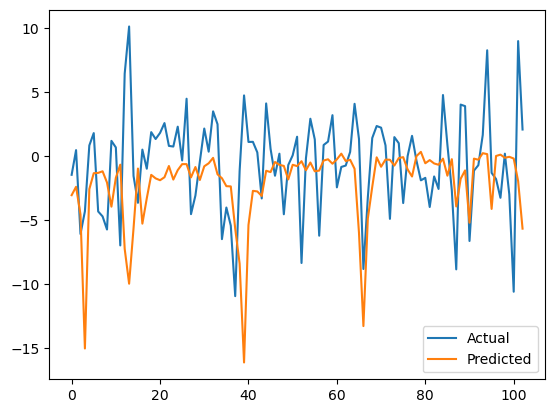

In [13]:
model = create_model('MSFT','max',3)
date,X,y= genreate_stock_data('MSFT','5mo')
model_predict(model,3,X,y)

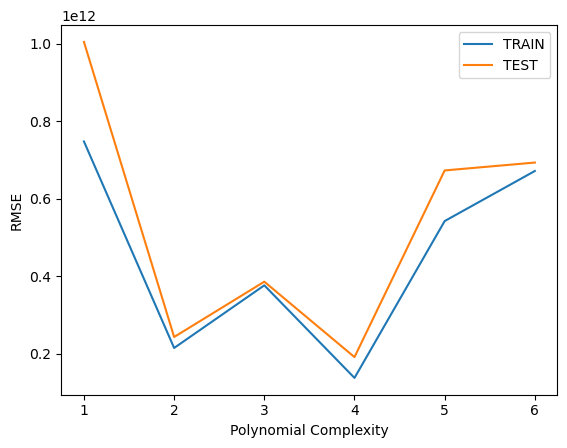

In [14]:
evaluate_stock('Tsla','max',7)

11.861171071038802


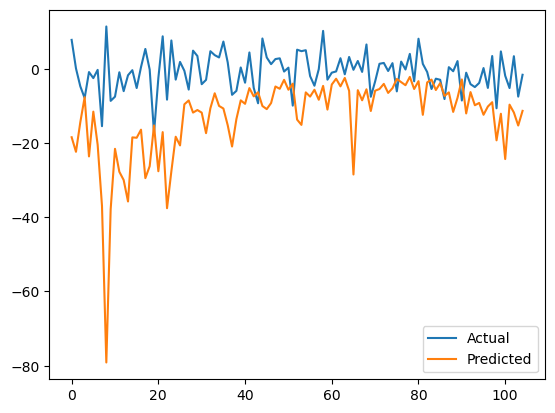

In [417]:
model = create_model('TSLA','max',4)
date,X,y= genreate_stock_data('TSLA','5mo')
model_predict(model,4,X,y)

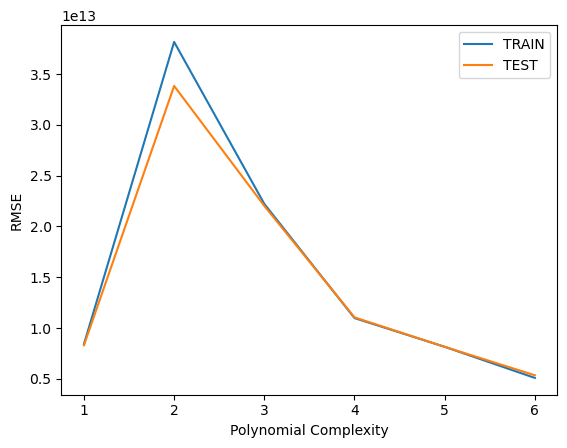

In [16]:
evaluate_stock('ADBE','max',7)

5.865902372607314


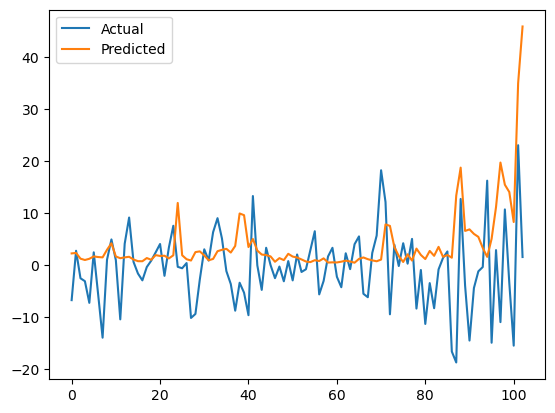

In [19]:
model = create_model('ADBE','max',4)
date,X,y= genreate_stock_data('ADBE','5mo')
model_predict(model,4,X,y)

In [27]:
train_RMSE = mean_absolute_percentage_error([10,10],[2,2])

In [28]:
train_RMSE

0.8